## Chap03) Classification
## Logistic Regression

![1_1.png](./materials/1_1.png)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
x = np.array([6,8,12,15,20])
y = np.array([7,11,13,20.5, 19.3])

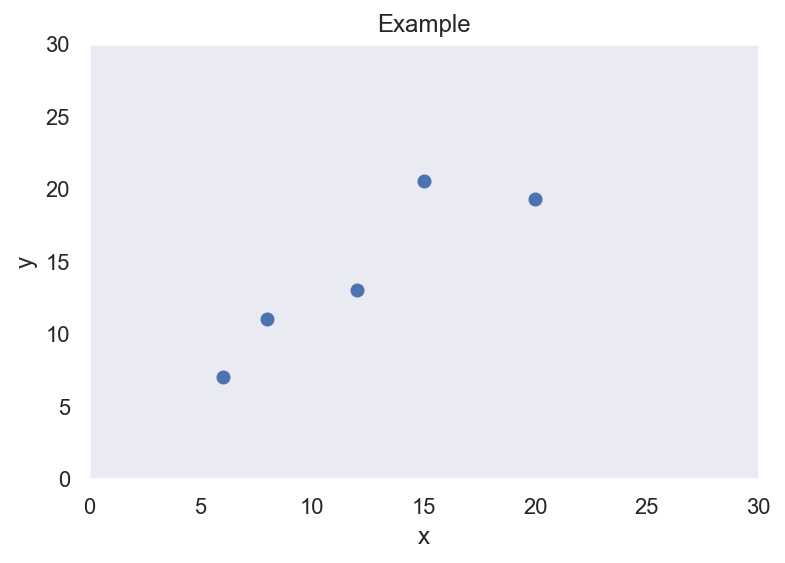

In [5]:
plt.figure()
plt.plot(x, y, 'o')
plt.title('Example')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([0, 30, 0, 30])
plt.grid()

## 1)Dataset

#### -데이터 분석에 사용할 데이터를 Scikit learn으로부터 불러온다  
Breast_cancer Dataset  
Malignant(악성), Benign(양성)  
Dataset info LINK : https://scikit-learn.org/stable/datasets/index.html

#### -위스콘신대 유방암 진단 데이터(WDBC)
- class   : 2
- 샘플수 : 569개
- Feature : 32개 (ID, 진단결과, 30개의 실측값) 
- Samples per class : 212(M, labeled '0'), 357(B, labeled '1')

-유방암 데이터로 악성(M), 양성(B) 판단하는 모델 만들기

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

#print(cancer['DESCR'][:3000])

In [5]:
#cancer

In [6]:
#cancer.feature_names

In [7]:
x=pd.DataFrame(cancer.data)
y=pd.Series(cancer.target)
#print(x.shape)
#print(y.shape)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=1234)

## 2) Model

#### - Scikit learn 에서 제공하는 Logistic Regression 라이브러리를 가지고 와서 모델로 사용한다

In [9]:
from sklearn.linear_model import LogisticRegression 

model= LogisticRegression(solver= 'lbfgs').fit(x_train, y_train)

C:\Users\chosm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
print(model.coef_)
print(model.coef_.shape)
model.intercept_

[[ 0.83878526  0.46479295  0.31973505 -0.01308009 -0.02919737 -0.15176881
  -0.19618968 -0.08265688 -0.03111173 -0.00774087  0.03912154  0.31731821
   0.03634961 -0.08858753 -0.00118508 -0.03115576 -0.0350857  -0.00971754
  -0.00214444 -0.00329745  0.92757349 -0.52317324 -0.25295857 -0.01632211
  -0.05368921 -0.4963069  -0.56855672 -0.16557227 -0.10666614 -0.04859206]]
(1, 30)


array([0.17779868])

In [11]:
print('Train Accuracy : ', model.score(x_train, y_train))
print('Test Accuracy : ',model.score(x_test, y_test))

Train Accuracy :  0.957286432160804
Test Accuracy :  0.9122807017543859


## 3) Hyperparameter조정  
 -C: 정규화 규제 조절 상수  
 -solver: 최적화에 사용할 알고리즘 결정   
 -max_iter: 최적화가 수렴하게 만드는 최대 반복 횟수 값   (default=100)  
 -penalty: L1, L2 제약 조건 설정  
 -class_weight: 데이터의 Positive에 직접 가중치를 설정하여 학습의 강도 조절  

### -C값 조절 (&max_iter)

In [12]:
model1 = LogisticRegression(C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model2 = LogisticRegression(C=0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model3 = LogisticRegression(C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model4 = LogisticRegression(C=10, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
model5 = LogisticRegression(C=100, solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', model1.score(x_train, y_train))
print('Train Accuracy : ', model2.score(x_train, y_train))
print('Train Accuracy : ', model3.score(x_train, y_train))
print('Train Accuracy : ', model4.score(x_train, y_train))
print('Train Accuracy : ', model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


C:\Users\chosm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
print('Test Accuracy : ', model1.score(x_test, y_test))
print('Test Accuracy : ', model2.score(x_test, y_test))
print('Test Accuracy : ', model3.score(x_test, y_test))
print('Test Accuracy : ', model4.score(x_test, y_test))
print('Test Accuracy : ', model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.9415204678362573


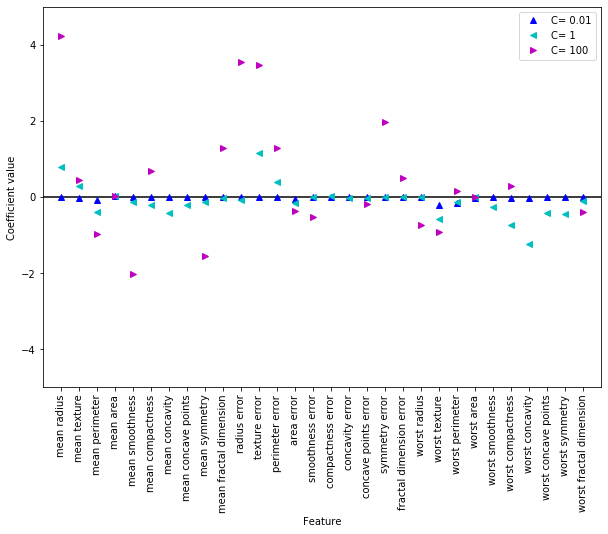

In [14]:
plt.figure(figsize= (10,7))  #figsize 그래프 크기 조절

plt.plot(model1.coef_.T, '^b', label="C= 0.01") 
plt.plot(model3.coef_.T, '<c', label="C= 1")
plt.plot(model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90) # X축 범주 넣기

xlims = plt.xlim(-1,30)
plt.hlines(0, -1, 30) # 수평선 긋기  hlines(y값, x최소값, x최대값)
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### -L2 정규화 적용

In [15]:
l2_model1 = LogisticRegression(penalty='l2', C=0.01, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model2 = LogisticRegression(penalty='l2',C=0.1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model3 = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model4 = LogisticRegression(penalty='l2',C=10, solver='lbfgs', max_iter=5000).fit(x_train, y_train)
l2_model5 = LogisticRegression(penalty='l2',C=100, solver='lbfgs', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l2_model1.score(x_train, y_train))
print('Train Accuracy : ', l2_model2.score(x_train, y_train))
print('Train Accuracy : ', l2_model3.score(x_train, y_train))
print('Train Accuracy : ', l2_model4.score(x_train, y_train))
print('Train Accuracy : ', l2_model5.score(x_train, y_train))

Train Accuracy :  0.9597989949748744
Train Accuracy :  0.9623115577889447
Train Accuracy :  0.9723618090452262
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9874371859296482


C:\Users\chosm\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
print('Test Accuracy : ', l2_model1.score(x_test, y_test))
print('Test Accuracy : ', l2_model2.score(x_test, y_test))
print('Test Accuracy : ', l2_model3.score(x_test, y_test))
print('Test Accuracy : ', l2_model4.score(x_test, y_test))
print('Test Accuracy : ', l2_model5.score(x_test, y_test))

Test Accuracy :  0.9298245614035088
Test Accuracy :  0.9298245614035088
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9473684210526315
Test Accuracy :  0.9415204678362573


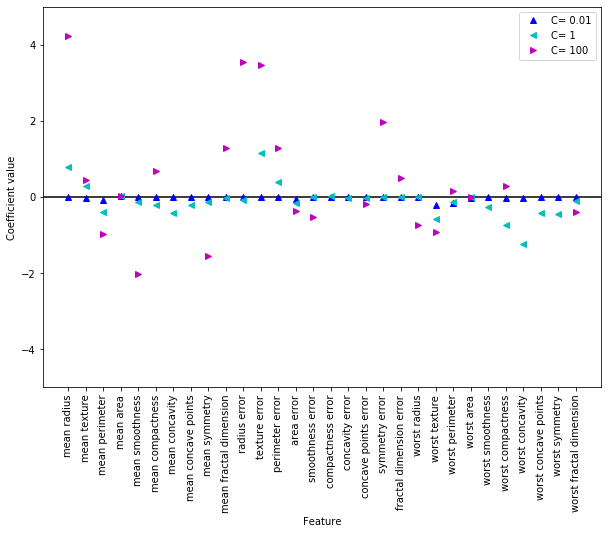

In [17]:
plt.figure(figsize= (10,7))

plt.plot(l2_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l2_model3.coef_.T, '<c', label="C= 1")
plt.plot(l2_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

### L1 정규화 적용

In [18]:
l1_model1 = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model2 = LogisticRegression(penalty='l1',C=0.1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model3 = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model4 = LogisticRegression(penalty='l1',C=10, solver='liblinear', max_iter=5000).fit(x_train, y_train)
l1_model5 = LogisticRegression(penalty='l1',C=100, solver='liblinear', max_iter=5000).fit(x_train, y_train)

print('Train Accuracy : ', l1_model1.score(x_train, y_train))
print('Train Accuracy : ', l1_model2.score(x_train, y_train))
print('Train Accuracy : ', l1_model3.score(x_train, y_train))
print('Train Accuracy : ', l1_model4.score(x_train, y_train))
print('Train Accuracy : ', l1_model5.score(x_train, y_train))

Train Accuracy :  0.9271356783919598
Train Accuracy :  0.9422110552763819
Train Accuracy :  0.9673366834170855
Train Accuracy :  0.9824120603015075
Train Accuracy :  0.9974874371859297


In [19]:
print('Test Accuracy : ', l1_model1.score(x_test, y_test))
print('Test Accuracy : ', l1_model2.score(x_test, y_test))
print('Test Accuracy : ', l1_model3.score(x_test, y_test))
print('Test Accuracy : ', l1_model4.score(x_test, y_test))
print('Test Accuracy : ', l1_model5.score(x_test, y_test))

Test Accuracy :  0.9181286549707602
Test Accuracy :  0.9239766081871345
Test Accuracy :  0.935672514619883
Test Accuracy :  0.9415204678362573
Test Accuracy :  0.9532163742690059


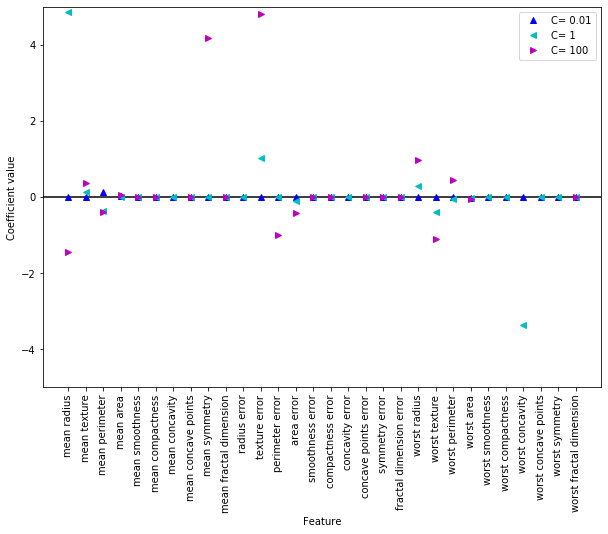

In [20]:
plt.figure(figsize= (10,7))

plt.plot(l1_model1.coef_.T, '^b', label="C= 0.01")
plt.plot(l1_model3.coef_.T, '<c', label="C= 1")
plt.plot(l1_model5.coef_.T, '>m', label="C= 100")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Coefficient value")
plt.legend()

## 4.성능평가

### -최종모델 선정

In [21]:

final_model = LogisticRegression(penalty='l1',
                                 C=100, 
                                 solver='liblinear', 
                                 max_iter=5000).fit(x_train, y_train)


In [22]:
pred_train = final_model.predict(x_train)
pred_test = final_model.predict(x_test)
pred_test

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

### - 성능 평가

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion = 
acc       = accuracy_score(y_test, pred_test)
prc       = 
rec       = 
f1s       = 

print('<Confusion matrix>')
print(confusion)
print(f'Accuracy:{acc:.2f}, Precision: {prc:.2f}, Recall: {rec:.2f}, F1-score: {f1s:.2f}')

<Confusion matrix>
[[ 60   6]
 [  2 103]]
Accuracy:0.95, Precision: 0.94, Recall: 0.98, F1-score: 0.96


In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        66
           1       0.94      0.98      0.96       105

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### -정확도(Precision) 과 재현율(Recall)

In [29]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = 
print(precisions.shape)
print(thresholds.shape)

(114,)
(113,)


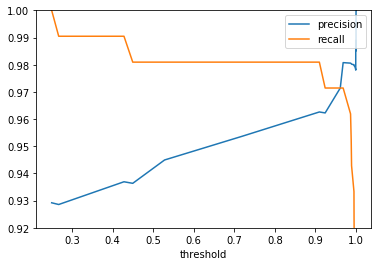

In [30]:
# Threshold 와 관계
plt.figure()
plt.plot(thresholds, ? , label = 'precision') # precision 마지막 값은 1이 포함, 마지막 값 제외
plt.plot(thresholds, ? , label = 'recall')  # recall의 마지막 값은 0이 포함, 마지막 값 제외
plt.xlabel('threshold')
plt.ylim([0.92,1])
plt.legend(loc = 'upper right') # upper/ center/ lower

* threshold 조절

In [31]:
prob = final_model.predict_proba(x_test)[:, 1] # class 1 에 해당하는 값만 지정
prob = np.round(prob,3)  # numpy에서 지정된 소수점 자리까지 반올림
prob

array([0.998, 1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   ,
       0.   , 0.   , 0.998, 1.   , 0.997, 1.   , 0.   , 1.   , 1.   ,
       1.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.997, 1.   ,
       1.   , 0.   , 0.45 , 1.   , 0.   , 1.   , 0.   , 0.995, 0.989,
       1.   , 1.   , 0.999, 0.   , 0.999, 0.968, 1.   , 1.   , 0.   ,
       0.924, 1.   , 1.   , 1.   , 1.   , 0.   , 0.987, 1.   , 0.996,
       1.   , 1.   , 0.   , 0.   , 1.   , 1.   , 0.961, 1.   , 0.   ,
       1.   , 0.   , 1.   , 1.   , 1.   , 0.   , 1.   , 0.   , 1.   ,
       1.   , 0.999, 0.267, 0.   , 0.   , 0.   , 0.   , 0.999, 0.063,
       1.   , 1.   , 1.   , 0.   , 0.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 0.   , 0.   , 1.   , 1.   , 0.   , 1.   , 1.   , 0.   ,
       0.   , 0.999, 0.   , 1.   , 0.   , 0.   , 0.999, 1.   , 1.   ,
       0.   , 1.   , 0.   , 1.   , 1.   , 1.   , 1.   , 0.   , 1.   ,
       0.   , 0.   ,

In [32]:
from sklearn.preprocessing import Binarizer
prob = prob.reshape(-1,1) # 차원 추가 
adj_prob = ?              # threshold 값보다 작거나 같으면 0 , else 1 

In [33]:
#Threshold 값 바뀐 precision, recall 값 확인
report = classification_report(y_test, adj_prob)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        66
           1       0.96      0.98      0.97       105

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

